<a href="https://colab.research.google.com/github/MarcoE25/Clases-Analisis-Datos/blob/main/Tarea_de_01_Manejo_avanzado_fechas_tiempos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗓️ Manejo avanzado de fechas y tiempos en Pandas
**Duración:** 1.5 horas


## Objetivos de la clase

- Entender el manejo de fechas y tiempos en Pandas.
- Aprender a convertir columnas a tipo `datetime`.
- Realizar operaciones temporales como filtrado, resampleo y ventanas móviles.
- Aplicar estos conocimientos en análisis de series temporales reales.


## 📅 Conversión de columnas a tipo datetime

In [ ]:
import pandas as pd

# Simular un DataFrame con fechas como strings
df = pd.DataFrame({
    "fecha": ["2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04"],
    "ventas": [100, 150, 200, 130]
})

# Convertir a datetime
df["fecha"] = pd.to_datetime(df["fecha"])
df.dtypes


,0
fecha,datetime64[ns]
ventas,int64


## ⏰ Indexado temporal y filtrado

In [ ]:

# Establecer la fecha como índice
df.set_index("fecha", inplace=True)

# Filtrar por fecha
df.loc["2024-01-02":"2024-01-03"]


,ventas
fecha,
2024-01-02,150
2024-01-03,200


## 📊 Resampleo (resampling)

In [ ]:

# Resampleo por semana (W), sumando ventas
df.resample("W").sum()


,ventas
fecha,
2024-01-07,580


## 🔁 Ventanas móviles (rolling)

In [ ]:

# Rolling window de 2 días
df.rolling(window=2).mean()


,ventas
fecha,
2024-01-01,NaN
2024-01-02,125.0
2024-01-03,175.0
2024-01-04,165.0


## 📈 Caso práctico: Análisis de visitas diarias en un sitio web

In [ ]:

# Simular un DataFrame con fechas diarias y visitas
fechas = pd.date_range(start="2024-01-01", end="2024-01-31")
import numpy as np
visitas = np.random.randint(100, 1000, size=len(fechas))

df_visitas = pd.DataFrame({"fecha": fechas, "visitas": visitas})
df_visitas.set_index("fecha", inplace=True)

# Visualizar visitas semanales promedio
df_visitas.resample("W").mean()


,visitas
fecha,
2024-01-07,443.142857
2024-01-14,695.857143
2024-01-21,518.142857
2024-01-28,536.714286
2024-02-04,563.333333


## 🧠 Ejercicios propuestos


1. Convierte una columna de fechas en un DataFrame propio a `datetime` y hazla índice.
2. Calcula la media móvil de 7 días de una serie de datos numéricos.
3. Usa `resample()` para obtener estadísticas mensuales de algún dataset.
4. Genera una gráfica de visitas promedio por semana usando `matplotlib`.

> Tip: puedes usar datos de Kaggle, datos abiertos del INEGI o simulaciones propias.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar un rango de fechas con un formato no estándar
fechas_str = pd.date_range(start='2024-01-01', end='2024-03-31').strftime('%d-%m-%Y')

# Generar datos de visitas diarios simulados
np.random.seed(0)
visitas = np.random.randint(500, 2500, size=len(fechas_str))

# Crear el DataFrame
df_visitas = pd.DataFrame({
    'fecha_str': fechas_str,
    'visitas': visitas
})

print("DataFrame inicial:")
df_visitas


DataFrame inicial:


,fecha_str,visitas
0,01-01-2024,1184
1,02-01-2024,1059
2,03-01-2024,2153
3,04-01-2024,1716
4,05-01-2024,1335
...,...,...
86,27-03-2024,2394
87,28-03-2024,1643
88,29-03-2024,1279
89,30-03-2024,930


# 1 Convierte una columna de fechas en un DataFrame propio a datetime y hazla índice.



In [23]:
#df_visitas['fecha_str'] = pd.to_datetime(df_visitas['fecha_str'], format='%d-%m-%Y')
df_visitas.dtypes
#df_visitas.set_index("fecha_str", inplace=True)
df_visitas

,visitas
fecha_str,
2024-01-01,1184
2024-01-02,1059
2024-01-03,2153
2024-01-04,1716
2024-01-05,1335
...,...
2024-03-27,2394
2024-03-28,1643
2024-03-29,1279


# 2 Calcula la media móvil de 7 días de una serie de datos numéricos.

In [29]:
df_visitas.rolling(window=7).mean()

,visitas
fecha_str,
2024-01-01,NaN
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
...,...
2024-03-27,1456.142857
2024-03-28,1492.571429
2024-03-29,1567.142857


# 3 Usa resample() para obtener estadísticas mensuales de algún dataset.

In [28]:
df_visitas.resample("ME").mean()


,visitas
fecha_str,
2024-01-31,1482.000000
2024-02-29,1377.965517
2024-03-31,1445.838710


# 4 Genera una gráfica de visitas promedio por semana usando matplotlib.

In [36]:
df_semana=df_visitas.resample("W").mean()


<Axes: title={'center': 'Visitas promedio por semana'}, xlabel='fecha_str'>

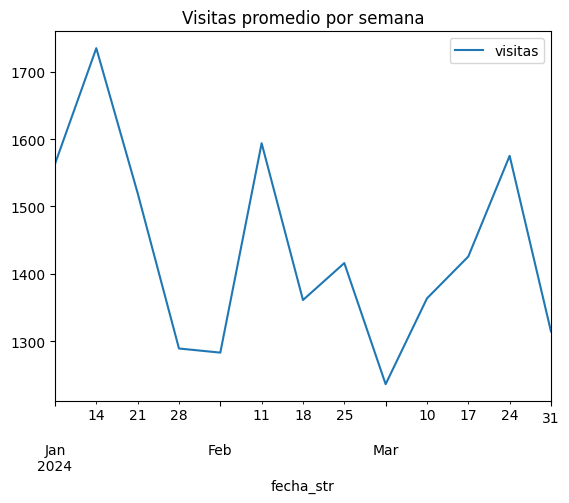

In [37]:
df_semana.plot(y="visitas", kind='line', title='Visitas promedio por semana')